In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DistilBertForSequenceClassification, RobertaForSequenceClassification, RobertaTokenizer, AlbertForSequenceClassification, AlbertTokenizer, DistilBertTokenizer
import warnings
import time

warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('dataset.csv')
df = df[['text', 'rating']].dropna()
df.head()

,text,rating
0,work great. use a new one every month,5.0
1,Little on the thin side,5.0
2,"Quick delivery, fixed the issue!",5.0
3,I wasn't sure whether these were worth it or n...,5.0
4,Easy to install got the product expected to re...,5.0


In [38]:
df['Sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)
df.head()

,text,rating,Sentiment
0,work great. use a new one every month,5.0,1
1,Little on the thin side,5.0,1
2,"Quick delivery, fixed the issue!",5.0,1
3,I wasn't sure whether these were worth it or n...,5.0,1
4,Easy to install got the product expected to re...,5.0,1


In [39]:
model_results=[]
inference_time=[]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.2, random_state=42)

In [41]:
# 1. Classical Models: TF-IDF + SVM, Logistic Regression, Naive Bayes

# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [42]:
# Naive Bayes
nb_model_start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
nb_model_end_time = time.time()
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds)
nb_recall = recall_score(y_test, nb_preds)
nb_f1_score = f1_score(y_test, nb_preds)
model_results.append(["Naive Bayes",nb_accuracy,nb_precision,nb_recall,nb_f1_score])
print(model_results)
inference_time.append(["Naive Bayes",nb_model_end_time - nb_model_start_time])
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Naive Bayes Precision: ",precision_score(y_test, nb_preds))
print("Naive Bayes Recall: ",recall_score(y_test, nb_preds))
print("Naive Bayes F1 Score: ",f1_score(y_test, nb_preds))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))
print("Naive Bayes Training Time:", nb_model_end_time - nb_model_start_time, "seconds")

[['Naive Bayes', 0.851712928232058, 0.8509883426254435, 0.9985132322331252, 0.9188671500889315]]
Naive Bayes Accuracy: 0.851712928232058
Naive Bayes Precision:  0.8509883426254435
Naive Bayes Recall:  0.9985132322331252
Naive Bayes F1 Score:  0.9188671500889315
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.08      0.14       636
           1       0.85      1.00      0.92      3363

    accuracy                           0.85      3999
   macro avg       0.88      0.54      0.53      3999
weighted avg       0.86      0.85      0.79      3999

Naive Bayes Training Time: 0.011330842971801758 seconds


In [43]:
# Logistic Regression
lr_model_start_time = time.time()
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)
lr_model_end_time = time.time()
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1_score = f1_score(y_test, lr_preds)
model_results.append(["Logistic Regression",lr_accuracy,lr_precision,lr_recall,lr_f1_score])
print(model_results)
inference_time.append(["Logistic Regression",lr_model_end_time - lr_model_start_time])
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Logistic Regression Precision: ",precision_score(y_test, lr_preds))
print("Logistic Regression Recall: ",recall_score(y_test, lr_preds))
print("Logistic Regression F1 Score: ",f1_score(y_test, lr_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))
print("Logistic Regression Training Time:", lr_model_end_time - lr_model_start_time, "seconds")

[['Naive Bayes', 0.851712928232058, 0.8509883426254435, 0.9985132322331252, 0.9188671500889315], ['Logistic Regression', 0.889472368092023, 0.8969828757814624, 0.9812667261373773, 0.9372337404146549]]
Logistic Regression Accuracy: 0.889472368092023
Logistic Regression Precision:  0.8969828757814624
Logistic Regression Recall:  0.9812667261373773
Logistic Regression F1 Score:  0.9372337404146549
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.40      0.54       636
           1       0.90      0.98      0.94      3363

    accuracy                           0.89      3999
   macro avg       0.85      0.69      0.74      3999
weighted avg       0.88      0.89      0.87      3999

Logistic Regression Training Time: 0.12631940841674805 seconds


In [44]:
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy','Precision','Recall','F1 Score'])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.851713   0.850988  0.998513  0.918867
1  Logistic Regression  0.889472   0.896983  0.981267  0.937234


In [45]:
# SVM
svm_model_start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)
svm_model_end_time = time.time()
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1_score = f1_score(y_test, svm_preds)
model_results.append(["SVM",svm_accuracy,svm_precision,svm_recall,svm_f1_score])
print(model_results)
inference_time.append(["SVM",svm_model_end_time - svm_model_start_time])
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Precision: ",precision_score(y_test, svm_preds))
print("SVM Recall: ",recall_score(y_test, svm_preds))
print("SVM F1 Score: ",f1_score(y_test, svm_preds))
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))
print("SVM Training Time:", svm_model_end_time - svm_model_start_time, "seconds")

[['Naive Bayes', 0.851712928232058, 0.8509883426254435, 0.9985132322331252, 0.9188671500889315], ['Logistic Regression', 0.889472368092023, 0.8969828757814624, 0.9812667261373773, 0.9372337404146549], ['SVM', 0.8939734933733433, 0.9009549795361528, 0.9818614332441272, 0.9396698918611269]]
SVM Accuracy: 0.8939734933733433
SVM Precision:  0.9009549795361528
SVM Recall:  0.9818614332441272
SVM F1 Score:  0.9396698918611269
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.43      0.56       636
           1       0.90      0.98      0.94      3363

    accuracy                           0.89      3999
   macro avg       0.86      0.71      0.75      3999
weighted avg       0.89      0.89      0.88      3999

SVM Training Time: 80.90152215957642 seconds


In [46]:
# 2. Transformer Models: BERT, DistilBERT, RoBERTa, ALBERT (Hugging Face)

# Tokenizer and Input Formatting
def tokenize_data(texts, tokenizer, max_length=512):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=max_length, return_tensors="pt")

In [47]:
# Model training function for transformers
def train_transformer_model(model_class, tokenizer_class, model_name, X_train, y_train, X_test, y_test):
    tokenizer = tokenizer_class.from_pretrained(model_name)
    train_encodings = tokenize_data(X_train, tokenizer)
    test_encodings = tokenize_data(X_test, tokenizer)

    model = model_class.from_pretrained(model_name, num_labels=2)

    # Trainer setup
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=2,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir='./logs',
    )

    class CustomDataCollator:
        def __call__(self, features):
            # Assume features is a list of tuples (input_ids, attention_mask, labels)
            input_ids = [f[0] for f in features]
            attention_masks = [f[1] for f in features]
            labels = [f[2] for f in features]

            # Batch the inputs
            batch = {
                'input_ids': torch.stack(input_ids),
                'attention_mask': torch.stack(attention_masks),
                'labels': torch.tensor(labels)
            }
            return batch

    # Use the custom data collator
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=torch.utils.data.TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values)),
        eval_dataset=torch.utils.data.TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values)),
        data_collator=CustomDataCollator()  # Added the custom data collator
    )

    trainer.train()
    preds = trainer.predict(torch.utils.data.TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))).predictions.argmax(-1)

    accuracy = accuracy_score(y_test, preds)
    precision_score = precision_score(y_test, preds)
    recall_score = recall_score(y_test, preds)
    f1_score = f1_score(y_test, preds)
    print(f"{model_name} Accuracy:", accuracy)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, preds))
    return accuracy,precision_score,recall_score,f1_score, model


In [ ]:
# Train BERT
bert_start_time = time.time()
bert_accuracy,bert_precision, bert_recall,bert_f1_score, bert_model = train_transformer_model(BertForSequenceClassification, BertTokenizer, "bert-base-uncased", X_train, y_train, X_test, y_test)
bert_end_time = time.time()
model_results.append(["BERT",bert_accuracy,bert_precision, bert_recall,bert_f1_score])
print(model_results)
inference_time.append(["BERT",bert_end_time - bert_start_time])
print("BERT Accuracy:", bert_accuracy)
print("BERT Training Time:", bert_end_time - bert_start_time, "seconds")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


In [ ]:
# Train DistilBERT
distilbert_start_time = time.time()
distilbert_accuracy, distilbert_model = train_transformer_model(DistilBertForSequenceClassification, DistilBertTokenizer, "distilbert-base-uncased", X_train, y_train, X_test, y_test)
distilbert_end_time = time.time()
model_results.append(["DistilBERT",distilbert_accuracy,distilbert_precision, distilbert_recall,distilbert_f1_score])
print(model_results)
inference_time.append(["DistilBERT",distilbert_end_time - distilbert_start_time])
print("DistilBERT Accuracy:", distilbert_accuracy)
print("DistilBERT Training Time:", distilbert_end_time - distilbert_start_time, "seconds")

In [ ]:
# Train RoBERTa
roberta_start_time = time.time()
roberta_accuracy, roberta_model = train_transformer_model(RobertaForSequenceClassification, RobertaTokenizer, "roberta-base", X_train, y_train, X_test, y_test)
roberta_end_time = time.time()
model_results.append(["RoBERTa",roberta_accuracy,roberta_precision, roberta_recall,roberta_f1_score])
print(model_results)
inference_time.append(["RoBERTa",roberta_end_time - roberta_start_time])
print("RoBERTa Accuracy:", roberta_accuracy)
print("RoBERTa Training Time:", roberta_end_time - roberta_start_time, "seconds")

In [ ]:
# Train ALBERT
# Use AlbertTokenizer instead of BertTokenizer
albert_start_time = time.time()
albert_accuracy, albert_model = train_transformer_model(AlbertForSequenceClassification, AlbertTokenizer, "albert-base-v2", X_train, y_train, X_test, y_test)
albert_end_time = time.time()
model_results.append(["ALBERT",albert_accuracy,albert_precision, albert_recall,albert_f1_score])
print(model_results)
inference_time.append(["ALBERT",albert_end_time - albert_start_time])
print("ALBERT Accuracy:", albert_accuracy)
print("ALBERT Training Time:", albert_end_time - albert_start_time, "seconds")

In [ ]:
# 3. Results Comparison

# Create a comparison table of accuracy for each model

results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy','Precision','Recall','F1 Score'])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.851713   0.850988  0.998513  0.918867
1  Logistic Regression  0.889472   0.896983  0.981267  0.937234


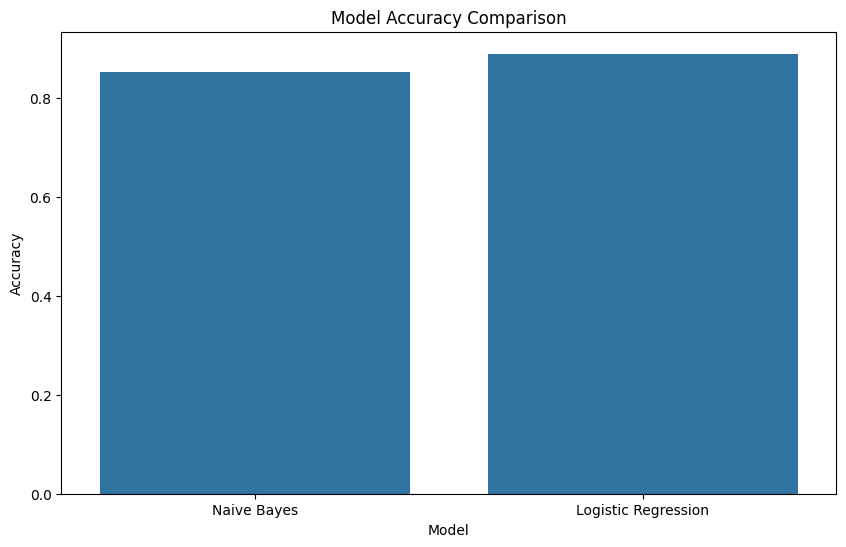

In [ ]:
# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

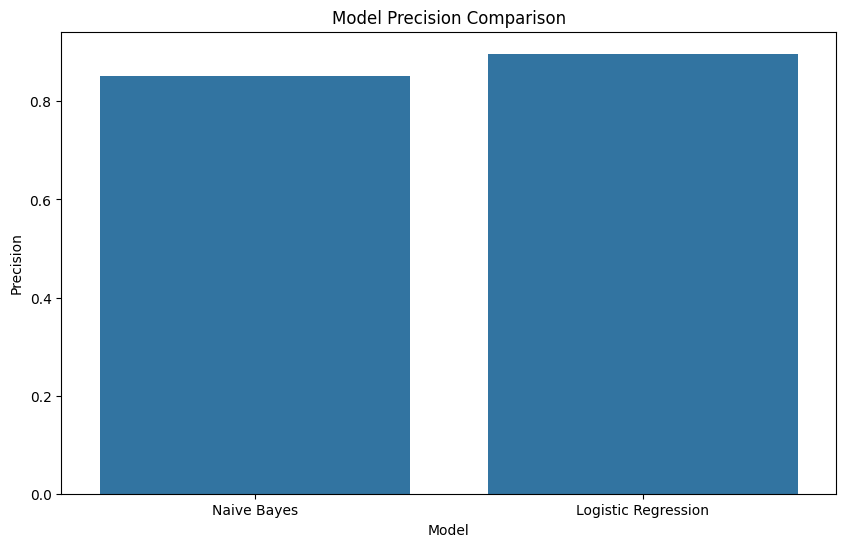

In [ ]:
# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results_df)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.show()

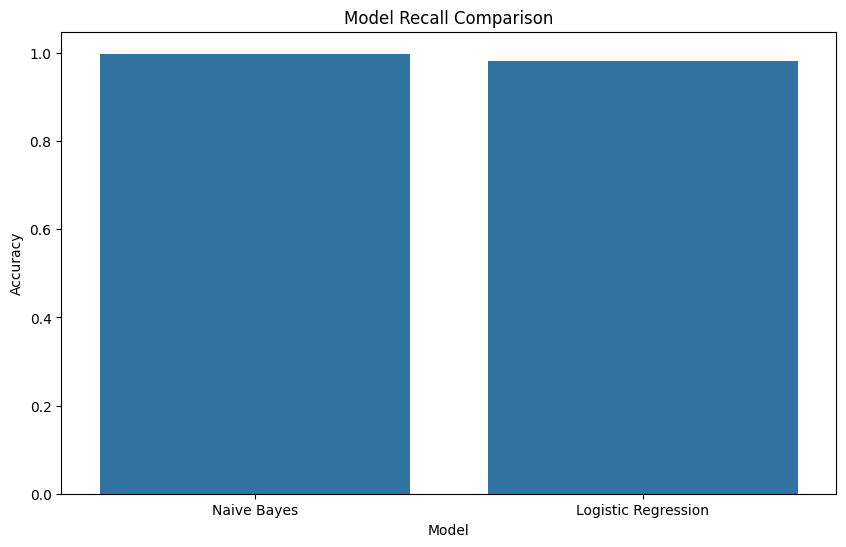

In [ ]:
# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Recall Comparison')
plt.show()

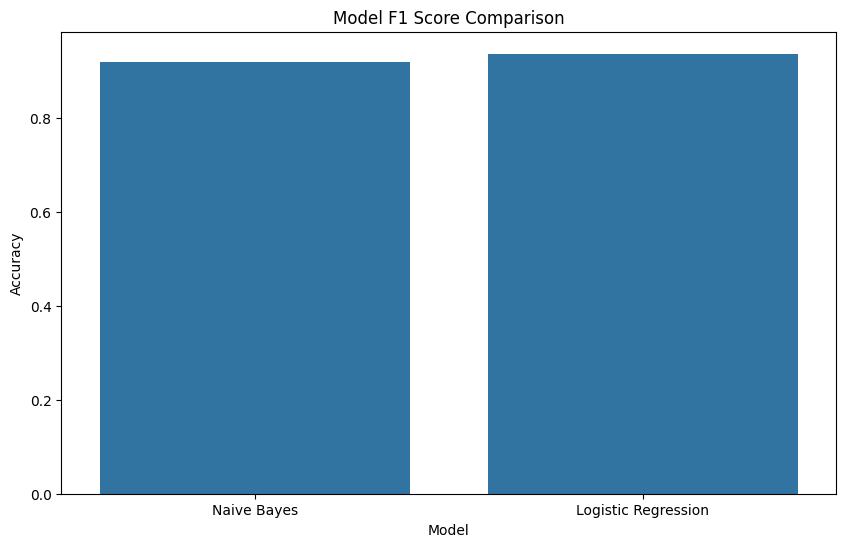

In [ ]:
# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model F1 Score Comparison')
plt.show()

                 Model  Inference Time
0          Naive Bayes        0.015279
1  Logistic Regression        0.122057


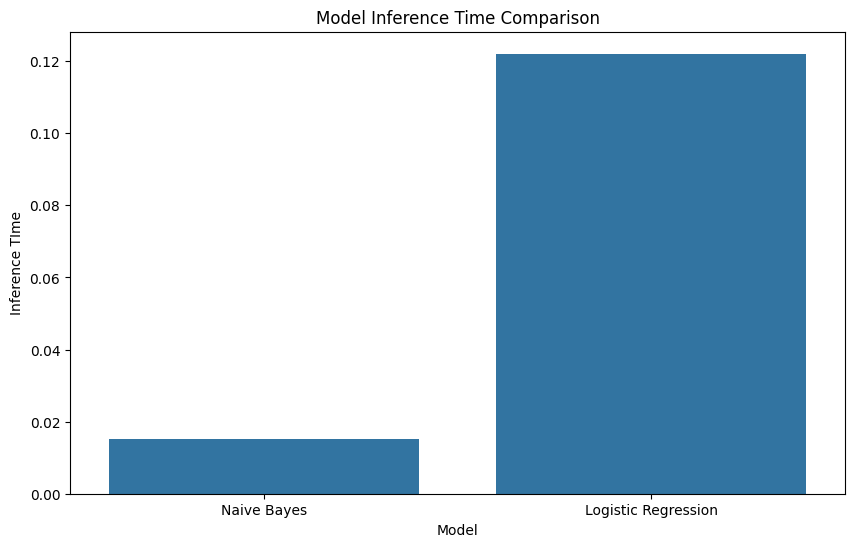

In [ ]:
infe_time = pd.DataFrame(inference_time, columns=['Model', 'Inference Time'])
print(infe_time)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Inference Time', data=infe_time)
plt.xlabel('Model')
plt.ylabel('Inference TIme')
plt.title('Model Inference Time Comparison')
plt.show()

In [ ]:
# 4. Save the best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"Best model: {best_model_name}")

# Save the best transformer model
if best_model_name == 'BERT':
    bert_model.save_pretrained("./best_model")
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    tokenizer.save_pretrained("./best_model")
elif best_model_name == 'DistilBERT':
    distilbert_model.save_pretrained("./best_model")
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    tokenizer.save_pretrained("./best_model")
elif best_model_name == 'RoBERTa':
    roberta_model.save_pretrained("./best_model")
    tokenizer = BertTokenizer.from_pretrained("roberta-base")
    tokenizer.save_pretrained("./best_model")
elif best_model_name == 'ALBERT':
    albert_model.save_pretrained("./best_model")
    tokenizer = BertTokenizer.from_pretrained("albert-base-v2")
    tokenizer.save_pretrained("./best_model")

In [ ]:
def load_model_and_predict(model_class, tokenizer_class, model_path, input_texts):
    # Load the saved model and tokenizer
    model = model_class.from_pretrained(model_path)
    tokenizer = tokenizer_class.from_pretrained(model_path)

    # Move the model to the correct device (CPU or GPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Set the model to evaluation mode (important for inference)
    model.eval()

    # Tokenize the input texts
    inputs = tokenizer(list(input_texts), padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform predictions
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1).cpu().numpy()

    return predictions


In [ ]:
# Example input texts (these can be reviews, feedback, etc.)
input_texts = ["This product is amazing and works really well!",
               "I didn't like the quality of this product.",
               "The delivery was fast and the packaging was good.",
               "Not worth the money. It broke after a week."]

# Path where the best model is saved
model_path = './best_model'  # Replace this with the correct path to your saved model

# Predict using the loaded BERT model
predicted_classes = load_model_and_predict(DistilBertForSequenceClassification, DistilBertTokenizer, model_path, input_texts)

# Print the predictions
for review, prediction in zip(input_texts, predicted_classes):
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")